In [43]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [44]:
df=pd.read_csv('insurance_pre.csv')

In [45]:
df=pd.get_dummies(df,drop_first=True)

In [46]:
df.head(5)

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [47]:
indep=df.drop('charges',axis=1)
dep=df['charges']

In [48]:
indep.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes'], dtype='object')

In [49]:

x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size = 0.25, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  

# Using Linear Regression

In [50]:

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred=regressor.predict(x_test)

In [52]:

r2lin=r2_score(y_test,y_pred)
r2lin

0.7952171980481992

In [53]:
imp_lin=regressor.coef_

In [54]:
imp_lin

array([3.53809284e+03, 1.95669249e+03, 5.29567137e+02, 5.91029154e+00,
       9.49189930e+03])

In [55]:
feature_names=['age', 'bmi', 'children', 'sex_male', 'smoker_yes']
df_lin= pd.DataFrame({'Feature': feature_names,'Importance': imp_lin})
df_lin = df_lin.sort_values(by='Importance', ascending=False)

In [56]:
df_lin

,Feature,Importance
4,smoker_yes,9491.899297
0,age,3538.092840
1,bmi,1956.692494
2,children,529.567137
3,sex_male,5.910292


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_1132\2932568315.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=df_lin, palette='viridis')


<Axes: xlabel='Feature', ylabel='Importance'>

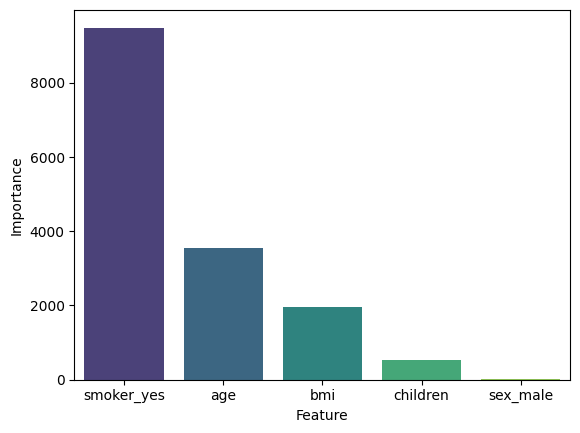

In [57]:
sns.barplot(x='Feature', y='Importance', data=df_lin, palette='viridis')

# Using Decision Tree

In [58]:

dtmodel = DecisionTreeRegressor(random_state = 0)
dtmodel.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
imp_dt=dtmodel.feature_importances_

In [60]:
imp_dt

array([0.13089862, 0.23878234, 0.02175528, 0.00443443, 0.60412933])

In [61]:
feature_names=['age', 'bmi', 'children', 'sex_male', 'smoker_yes']
df_dtree= pd.DataFrame({'Feature': feature_names,'Importance': imp_dt})
df_dtree = df_dtree.sort_values(by='Importance', ascending=False)

In [62]:
df_dtree

,Feature,Importance
4,smoker_yes,0.604129
1,bmi,0.238782
0,age,0.130899
2,children,0.021755
3,sex_male,0.004434


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_1132\4227154093.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=df_dtree, palette='viridis')


<Axes: xlabel='Feature', ylabel='Importance'>

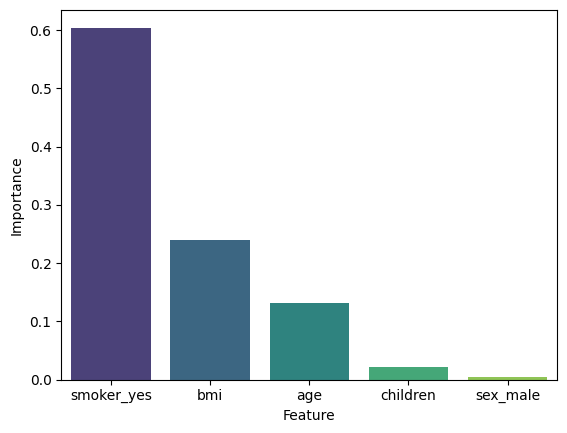

In [63]:

sns.barplot(x='Feature', y='Importance', data=df_dtree, palette='viridis')

# Using Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfmodel.fit(x_train, y_train)
imp_rf=rfmodel.feature_importances_

In [66]:
imp_rf

array([0.13980505, 0.21898392, 0.02066126, 0.00680995, 0.61373982])

In [65]:
df_rf= pd.DataFrame({'Feature': feature_names,'Importance': imp_rf})
df_rf = df_rf.sort_values(by='Importance', ascending=False)

In [67]:
df_rf

,Feature,Importance
4,smoker_yes,0.613740
1,bmi,0.218984
0,age,0.139805
2,children,0.020661
3,sex_male,0.006810


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_1132\2593454911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=df_rf, palette='viridis')


<Axes: xlabel='Feature', ylabel='Importance'>

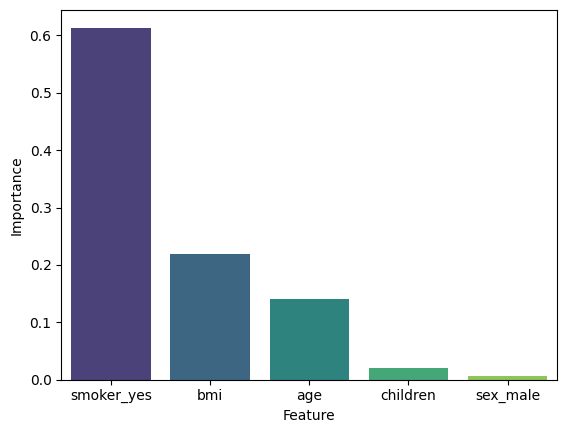

In [68]:
sns.barplot(x='Feature', y='Importance', data=df_rf, palette='viridis')